<a href="https://colab.research.google.com/github/odadoun/Ipython-Notebook/blob/master/covid_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
March 2020 - from Dadoun odadoun@gmail.com 

First test with colab.research.google : plot data from the Covid data base situation reports  https://github.com/CSSEGISandData/COVID-19 

By defaut those countries
["France","Italy","Spain","Germany"] can be change using [countries variable](https://colab.research.google.com/drive/1TWL5ngMU3Roxcn3VurEAqeqV1jjERlY7#scrollTo=7njuEf07X_6L&line=5&uniqifier=1)



In [0]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import sys
from datetime import datetime
import numpy as np
from collections import defaultdict
import collections 
import argparse
import pandas as pd

In [0]:
def read_online_file(which_data,*countries):
    base_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
    
    name_file="time_series_covid19_"+which_data+"_global.csv"
    url=base_url+name_file
    df = pd.read_csv(url)
    
    
    str_dates  = list(df.head(0))[4:]
    dates=[datetime.strptime(date,'%m/%d/%y') for date in str_dates]
 
    dico_countries = defaultdict(list)
    
    for index, row in df.iterrows():
        country=row['Country/Region']

        if country in countries:
            value=[int(i) if i is not '' else -1 for i in row[str_dates].values]
            dico_countries[country].append(value)
    return dates,dico_countries
 
def flat_list(matrix):
    flatten_matrix=[]
    for sublist in matrix: 
        for val in sublist: 
            flatten_matrix.append(val)
    return flatten_matrix

def return_curves(dico_countries,i_start,cumul): 
    curves=[] 
    dict_sum_data=defaultdict(list)
    
    for keys in dico_countries:
        # Using list comprehension
        res = [sum(i) for i in zip(*dico_countries[keys])] 
        dict_sum_data[keys].append(res)   
        dict_sum_data[keys]=flat_list(dict_sum_data[keys])
        #masked non existing value , it could happen ...
        masked_points=np.ma.array(dict_sum_data[keys][i_start:])

        diff_days=[j-i for i, j in zip(masked_points[:-1], masked_points[1:])] 
        diff_days.insert(0,0)
        
        if(cumul==True):
            curves.append((plt.plot_date(dates[i_start:],masked_points,marker="+",linestyle='--',label=str(keys)))[0])
        else:
            curves.append((plt.plot_date(dates[i_start:],diff_days,marker="+",linestyle='--',label=str(keys)))[0])
    return curves
       
def str2bool(v):
    if v.lower() in ('yes', 'true', 't', 'y', '1'):
        return True
    elif v.lower() in ('no', 'false', 'f', 'n', '0'):
        return False
    else:
        raise argparse.ArgumentTypeError('Boolean value expected.')
                                                

In [0]:
def mainstuff(which_data,cumul):
  #
  print("Plot: ", which_data)
  countries=["France","Italy","Spain","Germany"]#,"United Kingdom","Belgium"]
  # confirmed, deaths or recovered
   
  file_csv="time_series_covid19_" + which_data + "_global.csv" 
  print(file_csv)
  dates,dico_countries=read_online_file(which_data,*countries)
   
  fig, ax = plt.subplots()
  i_start = 14
  curves = return_curves(dico_countries,i_start,cumul)    
  #plt.yscale('log')
  ax.yaxis.set_ticks_position('both')
  ax.tick_params(labeltop=False, labelright=True)
  ax.xaxis.set_tick_params(rotation=30, labelsize=6)
  ax.set_ylabel(which_data) 
  fig.suptitle("Online Covid Data analysis", fontsize=16)
  lc=[curves[i] for i in range(len(curves))]
  plt.legend(handles=lc)
  plt.grid(True)
  plt.show()



Plot:  deaths
time_series_covid19_deaths_global.csv


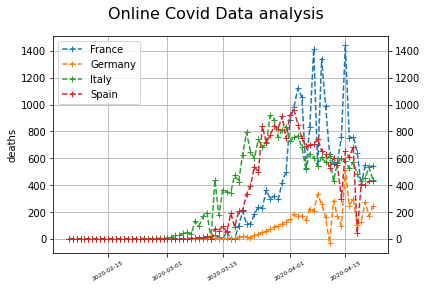

In [37]:
mainstuff("deaths",False)

Plot:  deaths
time_series_covid19_deaths_global.csv


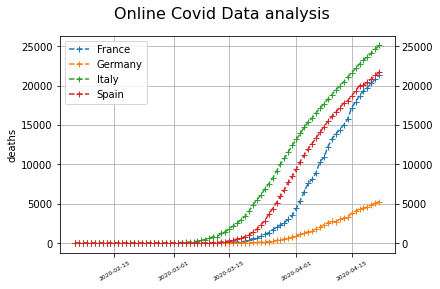

In [38]:
mainstuff("deaths",True)

Plot:  confirmed
time_series_covid19_confirmed_global.csv


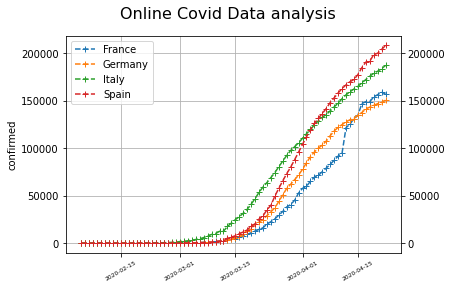

In [39]:
mainstuff("confirmed",True)

---> recovered ----  True
Plot:  recovered
time_series_covid19_recovered_global.csv


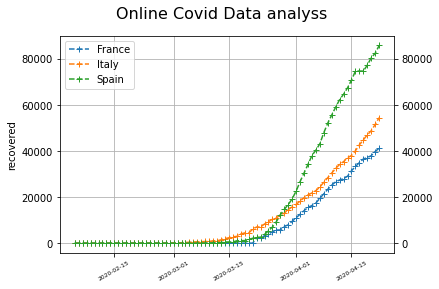

In [0]:
mainstuff("recovered",True)

Plot:  recovered
time_series_covid19_recovered_global.csv


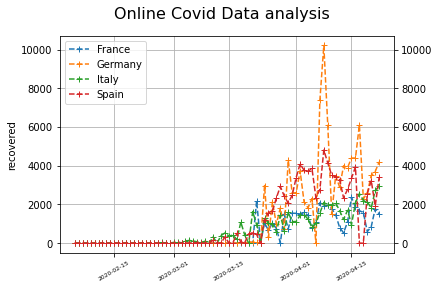

In [40]:
mainstuff("recovered",False)

Plot:  recovered
time_series_covid19_recovered_global.csv


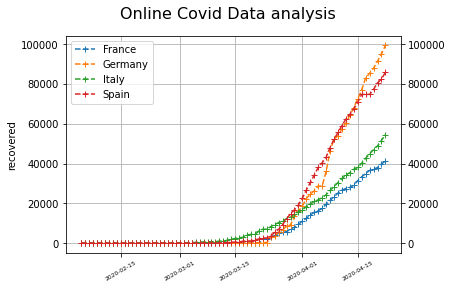

In [41]:
mainstuff("recovered",True)

In [0]:
£